# Google App Store - Exploratory Data Analysis

Abhishek Chandran  
abhishek.chandran@utah.edu  
u1125771  

Aniket Patil  
aniket.patil@utah.edu  
u1144414

Akansha Toppo  
u1137408@umail.utah.edu  
u1137408

Video : https://www.youtube.com/watch?v=S0kjamLC6yI

# Data Visualization

In [23]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [17]:
data = pd.read_csv('proj_final.csv')

## Matrix Scatter plot to visualize correlation between each column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002881CF28>,
      dtype=object)

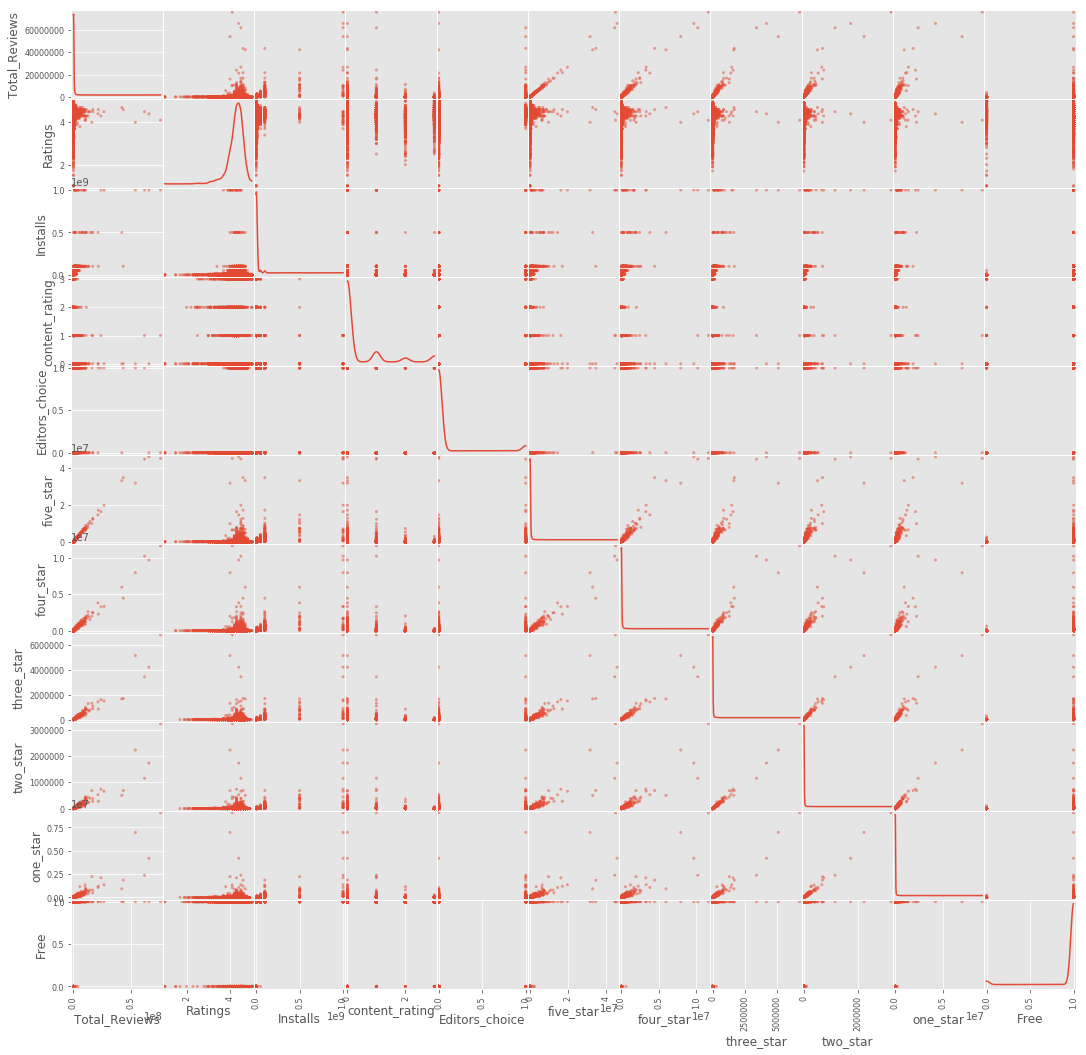

In [15]:
data_scatter=data[["Total_Reviews",'Ratings', 'Installs', 'content_rating', 'Editors_choice',"five_star","four_star",'three_star','two_star','one_star',"Free"]]
pd.plotting.scatter_matrix(data_scatter, figsize=(18,18), diagonal='kde')

## Heat map to show correlation between each column and its correlation value

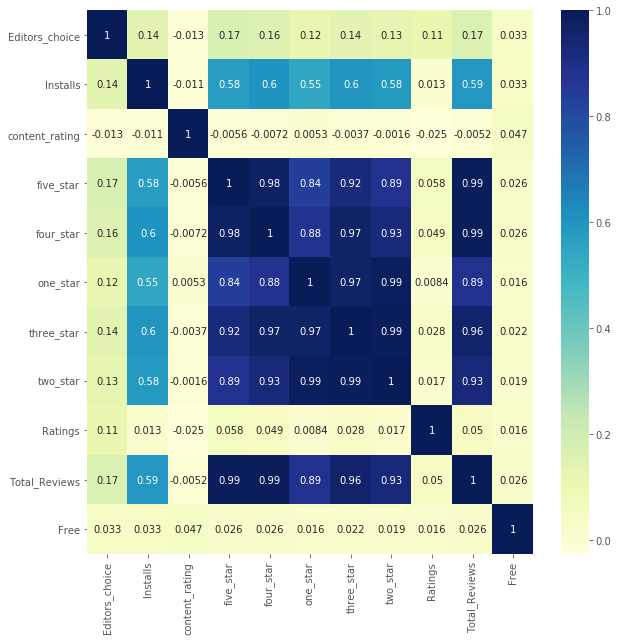

In [18]:
data_corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_corr,xticklabels=data_corr.columns, yticklabels=data_corr.columns, annot=True, cmap="YlGnBu", ax=ax)

**Interpretation ** We see that highest correlation is between total number of installs and total reviews i.e. 0.59. Correlation between one, two, three, four, and five stars seems to be high, but we would not be able to infer anything because during data cleaning, we calculated total reviews from individual star reviews.

## Bar plot to compare category wise (top 5) number of installs

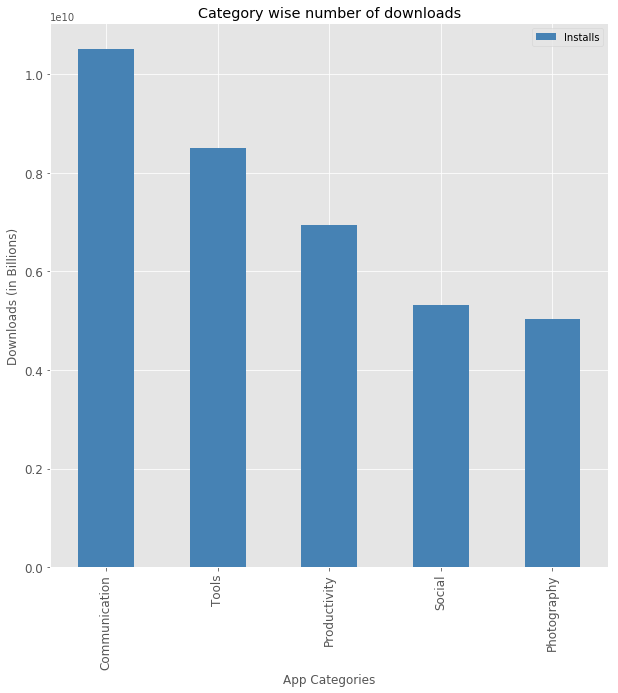

In [19]:
# Category wise number of installs
data_category_installs = data.groupby(["Categories"])["Installs"].sum().nlargest(5)
ax = data_category_installs.plot(kind='bar', title ="Category wise number of downloads", figsize=(10, 10), legend=True, fontsize=12, color="steelblue")
ax.set_xlabel("App Categories", fontsize=12)
ax.set_ylabel("Downloads (in Billions)", fontsize=12)
plt.show()

**Interpretation** Communication category has the most number of downloads with 1.5 billion downloads, followed by Tools and productivity category apps with 0.85 and 0.7 billion downloads respectively.

## Count Bar chart to visualize no of editor's choice apps w.r.t to each installs range

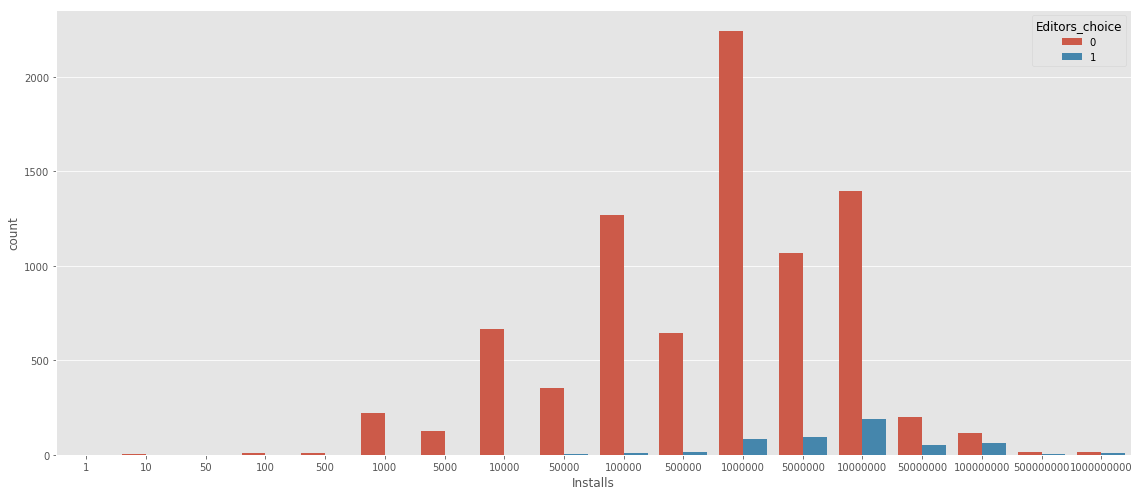

In [20]:
fig, ax = plt.subplots(figsize=(16,7))
sns.countplot(x="Installs",hue="Editors_choice",data=data,ax=ax)
plt.tight_layout()
plt.show()

**Interpretation** Apps with around hundred million installs have the highest number of editor's choice apps, followed by one billion downloads

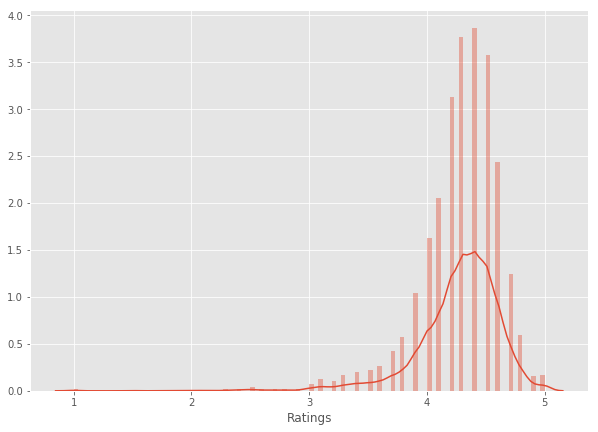

In [52]:
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(data["Ratings"], kde=True, ax=ax, bins="auto")

**Interpretation** Distribution plot shows that most number of apps have ratings around 4.5.

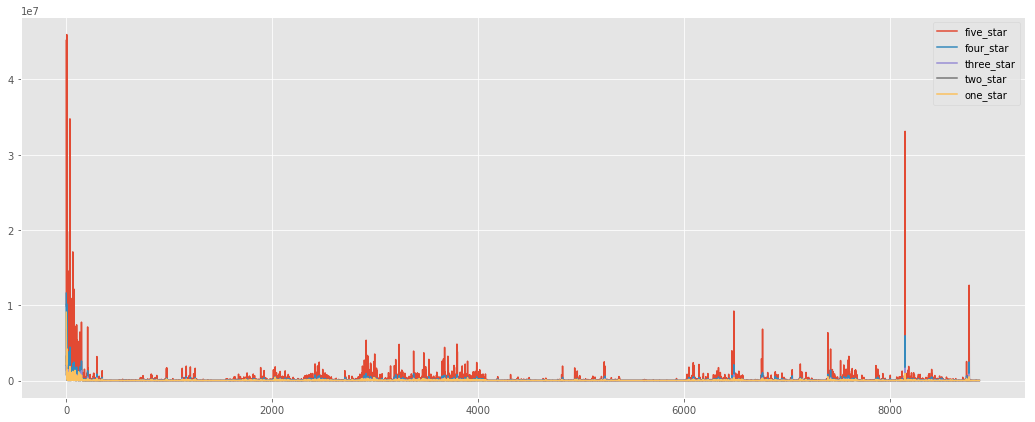

In [61]:
data_reviews = data[["five_star", "four_star", "three_star", "two_star", "one_star"]]
data_reviews.plot(figsize=(18,7))

**Interpretation** Here we see the ratings distribution for all the apps we collected through web scrapping. Apparently, most of the apps have more five star ratings as compared to four, three, two and one.

# Data Analysis

## Linear regression model

We are creating linear regression models for number of installs and reviews with total reviews, total ratings, five star ratings and installs as predictor variables, and check if any varibale influences number of installs and ratings. 

In [26]:
lin_ols=sm.ols(formula="Installs~Total_Reviews",data=data).fit()
lin_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     4810.
Date:                Sun, 22 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:44:57   Log-Likelihood:            -1.6932e+05
No. Observations:                8872   AIC:                         3.386e+05
Df Residuals:                    8870   BIC:                         3.386e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.908e+06   5.04e+05      9.734      0.000    3.92e+06     5.9e+06
Total_Reviews    19.2219      0.277     69.351      0.000      18.679      19.765
==============================================================================
Omnibus:                    16957.393   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32289680.630
Skew:                          14.886   Prob(JB):                         0.00
Kurtosis:                     297.044   Cond. No.                     1.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation** We got Rsquared value of about 35% with Installs as outcome variable and total reviews as predictor variable. Which shows that total reviews does not influence number of installs.

In [29]:
lin_ols=sm.ols(formula="Installs~Total_Reviews+five_star+four_star+Ratings",data=data).fit()
lin_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     1291.
Date:                Sun, 22 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:47:06   Log-Likelihood:            -1.6806e+05
No. Observations:                8811   AIC:                         3.361e+05
Df Residuals:                    8806   BIC:                         3.362e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.184e+07   6.06e+06      1.954      0.051   -3.84e+04    2.37e+07
Total_Reviews    15.6878      4.254      3.688      0.000       7.349      24.027
five_star       -25.0544      4.191     -5.978      0.000     -33.270     -16.839
four_star       142.0900     14.046     10.116      0.000     114.557     169.623
Ratings       -1.651e+06   1.42e+06     -1.166      0.244   -4.43e+06    1.12e+06
==============================================================================
Omnibus:                    16914.566   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31620751.523
Skew:                          15.049   Prob(JB):                         0.00
Kurtosis:                     294.933   Cond. No.                     2.80e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation** With number of installs as outcome varibale and all other columns as predictor variables, we see that r-squared value has gone up by around 2% as compared to model with just total reviews variable, though it still does not justify the number of downloads

In [30]:
lin_ols=sm.ols(formula="Ratings~Total_Reviews+five_star+four_star+Installs",data=data).fit()
lin_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ratings   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     22.60
Date:                Sun, 22 Apr 2018   Prob (F-statistic):           1.36e-18
Time:                        12:47:43   Log-Likelihood:                -3244.3
No. Observations:                8811   AIC:                             6499.
Df Residuals:                    8806   BIC:                             6534.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.2642      0.004   1124.593      0.000       4.257       4.272
Total_Reviews -1.908e-07    3.2e-08     -5.969      0.000   -2.53e-07   -1.28e-07
five_star       2.44e-07   3.15e-08      7.749      0.000    1.82e-07    3.06e-07
four_star      2.425e-07   1.06e-07      2.282      0.022    3.42e-08    4.51e-07
Installs      -9.348e-11   8.02e-11     -1.166      0.244   -2.51e-10    6.37e-11
==============================================================================
Omnibus:                     3535.687   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20852.037
Skew:                          -1.830   Prob(JB):                         0.00
Kurtosis:                       9.589   Cond. No.                     6.05e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We are going to perform the same set of linear regression models with ratings as the outcome variable and rest of the columns as the predictor variables.

In [33]:
lin_ols=sm.ols(formula="Ratings~Total_Reviews",data=data).fit()
lin_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ratings   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     21.93
Date:                Sun, 22 Apr 2018   Prob (F-statistic):           2.87e-06
Time:                        12:51:52   Log-Likelihood:                -3592.6
No. Observations:                8872   AIC:                             7189.
Df Residuals:                    8870   BIC:                             7203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.2672      0.004   1096.030      0.000       4.260       4.275
Total_Reviews  1.002e-08   2.14e-09      4.683      0.000    5.83e-09    1.42e-08
==============================================================================
Omnibus:                     4096.036   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36446.302
Skew:                          -2.005   Prob(JB):                         0.00
Kurtosis:                      12.084   Cond. No.                     1.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation** We see that r-squared value is quite low for each of the models i.e. 0.010 for ratings and installs models and 0.002 for ratings and all other columns models

We will be categorizing the apps as popular and unpopular. For this we considerd that if app is downloaded more than the mean of installs that is 10 million the app should be considered as popular else it isn't.

In [34]:
data["Installs"].describe()

count    8.872000e+03
mean     1.000126e+07
std      5.835189e+07
min      1.000000e+00
25%      1.000000e+05
50%      1.000000e+06
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [35]:
def popular(x):
    if x>1.000126e+07:
        return 1
    else:
        return 0
data["Installs"]=data["Installs"].apply(popular)

In [38]:
del data["Update_date"]
del data["Size"]
del data["Version_req"]
del data["App_Name"]
del data["Categories"]

Replacing na values in columns with zero

In [40]:
data["one_star"]=data["one_star"].fillna(value=0)
data["two_star"]=data["two_star"].fillna(value=0)
data["three_star"]=data["three_star"].fillna(value=0)
data["four_star"]=data["four_star"].fillna(value=0)

In [41]:
X=data.as_matrix()
y=data["Installs"].as_matrix()

## KNN Model

We split data into test and training data set and run KNN model on it and check its accuracy for number of installs

In [42]:
# Your code here
# Split into training and test sets
k=[150, 75,50 ,1]
for i in k:
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.3)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(XTrain, yTrain)
    y_pred = model.predict(XTrain)
    y_pred_test = model.predict(XTest)
    print("k=",i,'Train = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred))
    print("k=",i,'Test = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred_test))


('k=', 150, 'Train = ', 0.97085346215781)
('k=', 150, 'Test = ', 0.9691960931630353)
('k=', 75, 'Train = ', 0.9706924315619968)
('k=', 75, 'Test = ', 0.97145003756574)
('k=', 50, 'Train = ', 0.9723027375201289)
('k=', 50, 'Test = ', 0.9722013523666416)
('k=', 1, 'Train = ', 1.0)
('k=', 1, 'Test = ', 0.964312546957175)


**Interpretation** We got accuracy to be around 97.23% for train data set and around 97.22% for test data at k value 50.

## SVM Model

We run SVM model on test and train data set and run SVM model for number of installs.

In [44]:
x=X[0:5000]
Y=y[0:5000]
C=[1,10,50,75,100]
for i in C:
    XTrain, XTest, yTrain, yTest= train_test_split(x, Y, random_state=1, test_size=0.3)
    model = svm.SVC(kernel='rbf',C=i)
    model.fit(XTrain, yTrain)
    y_pred = model.predict(XTrain)
    print("C=",i,'Train Accuracy = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred))
    y_pred_test = model.predict(XTest)
    print("C=",i,'Test Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred_test))


('C=', 1, 'Train Accuracy = ', 1.0)
('C=', 1, 'Test Accuracy = ', 0.9413333333333334)
('C=', 10, 'Train Accuracy = ', 1.0)
('C=', 10, 'Test Accuracy = ', 0.9413333333333334)
('C=', 50, 'Train Accuracy = ', 1.0)
('C=', 50, 'Test Accuracy = ', 0.9413333333333334)
('C=', 75, 'Train Accuracy = ', 1.0)
('C=', 75, 'Test Accuracy = ', 0.9413333333333334)
('C=', 100, 'Train Accuracy = ', 1.0)
('C=', 100, 'Test Accuracy = ', 0.9413333333333334)


**Interpretation** We got accuracy to be around 94% on test data set and 100% for train data set.

Now we try to predict if the app should be Editors choice or not based on our dataset, we run the same set of models as above.

In [45]:
X=data.as_matrix()
y=data["Editors_choice"].as_matrix()

## KNN Model

In [46]:
# Split into training and test sets
k=[150, 75, 60,50 ,10,1]
for i in k:
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.3)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(XTrain, yTrain)
    y_pred = model.predict(XTrain)
    y_pred_test = model.predict(XTest)
    print("k=",i,'Train = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred))
    print("k=",i,'Test = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred_test))


('k=', 150, 'Train = ', 0.942512077294686)
('k=', 150, 'Test = ', 0.939519158527423)
('k=', 75, 'Train = ', 0.942512077294686)
('k=', 75, 'Test = ', 0.939519158527423)
('k=', 60, 'Train = ', 0.942512077294686)
('k=', 60, 'Test = ', 0.939519158527423)
('k=', 50, 'Train = ', 0.942512077294686)
('k=', 50, 'Test = ', 0.939519158527423)
('k=', 10, 'Train = ', 0.9431561996779388)
('k=', 10, 'Test = ', 0.9368895567242674)
('k=', 1, 'Train = ', 1.0)
('k=', 1, 'Test = ', 0.9015777610818934)


**Interpretation** We are getting accuracy around 94% for train datset and 93.9% for test dataset, and this behaviour is same accross all tested K values.

## SVM Model

In [127]:
x=X[0:5000]
Y=y[0:5000]
C=[1,10,50,100,200,300]
for i in C:
    XTrain, XTest, yTrain, yTest= train_test_split(x, Y, random_state=1, test_size=0.3)
    model = svm.SVC(kernel='rbf',C=i)
    model.fit(XTrain, yTrain)
    y_pred = model.predict(XTrain)
    print("C=",i,'Train Accuracy = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred))
    y_pred_test = model.predict(XTest)
    print("C=",i,'Test Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred_test))

C= 1 Train Accuracy =  1.0
C= 1 Test Accuracy =  0.9333333333333333
C= 10 Train Accuracy =  1.0
C= 10 Test Accuracy =  0.9333333333333333
C= 50 Train Accuracy =  1.0
C= 50 Test Accuracy =  0.9333333333333333
C= 100 Train Accuracy =  1.0
C= 100 Test Accuracy =  0.9333333333333333
C= 200 Train Accuracy =  1.0
C= 200 Test Accuracy =  0.9333333333333333
C= 300 Train Accuracy =  1.0
C= 300 Test Accuracy =  0.9333333333333333


**Interpretation** We are getting test dataset accuracy around 93.3% and 100% for train dataset.

# Conclusion

After collecting data from around 8900 apps from google play store, we cleaned it up and modeled it according to our objectives. We created visualization in order to view it better and get a better sense of how data is distributed, we creater scatter matrix plot, heat map, bar chart for top five category apps based on number of downloads, number of editors choice apps w.r.t to each doenloads range, histogram to view ratings distribution and ratings distribution spread accross all the apps we collected. We found that, max correlation is between number of installs and total number of reviews, communications category has the most number of downloads, avergae ratings is around 4.5 and most of the apps have greater number of five star ratings as compared to four, three, two and one ratings and apps with around ten million downloads have the greatest proportion of editor's choice apps.  

After cleaning and visualizing the data, we created linear regression models with installs and ratings as outcome variables, we found that there is no linear relationship between any of the variables with highest r-squared value around 37%. We then used the data on classification models like KNN and SVG for both number of installs and reviews, accuracy we got was quite high with around 97% and 94% respectively. 

Objectives and results we got:  
1) Which category has the most number of downloads and ratings?  
   Communications category has the most number of downloads and ratings.

2) How are rating and downloads are related?  
   Ratings and downloads has a correlation value of 0.59, and we did not find any linear relationship between them.
   
3) Does number of downloads and ratings have any effect of being awarded as editor's choice category?  
   Based on our visualizations, we see that apps with ten million downloads has the highest number of editors choice awards, and it does not increase or decrease as number of
   installs goes up or goes down.
   
4) Does paid apps have an effect on downloads or ratings?  
   We did not find any correlation between paid apps and number of downloads or ratings.